### 1. Import data and revelant packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
combined = pd.read_csv('/Users/admin/Downloads/combined_psf.csv')
combined = combined.drop(combined.columns[0], axis=1)
combined.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


In [3]:
combined['floor_range'] = combined['floor_range'].str.replace('~', '')
combined.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


In [4]:
# Label encoding
combined['street'] = combined['street'].str.upper()
combined['street'] = combined['street'].astype('category')
street_dict = dict(zip(combined['street'].cat.codes, combined['street']))
combined['street'] = combined['street'].cat.codes

combined['propertyType'] = combined['propertyType'].astype('category')
property_dict = dict(zip(combined['propertyType'].cat.codes, combined['propertyType']))
combined['propertyType'] = combined['propertyType'].cat.codes

combined['floor_range'] = combined['floor_range'].astype('category')
floor_dict = dict(zip(combined['floor_range'].cat.codes, combined['floor_range']))
combined['floor_range'] = combined['floor_range'].cat.codes

In [5]:
#street_mapping = pickle.load(open('/Users/admin/Downloads/street_mapping.pickle', 'rb'))
#floor_mapping = pickle.load(open('/Users/admin/Downloads/floor_mapping.pickle', 'rb'))
#property_mapping = pickle.load(open('/Users/admin/Downloads/property_mapping.pickle', 'rb'))

#combined['street'] = combined['street'].str.upper()
#combined['street'] = combined['street'].map(street_mapping)
#combined['propertyType'] = combined['propertyType'].map(property_mapping)
#combined['floor_range'] = combined['floor_range'].map(floor_mapping)

In [6]:
combined.dtypes

district              int64
street                int16
propertyType           int8
remaining_lease     float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_range            int8
sentiment           float64
month                object
floor_area_sqft     float64
price_psf           float64
dtype: object

In [7]:
combined['month']= pd.to_datetime(combined['month'])
train_df = combined[combined.month < "2020-01-01"]
train_df = train_df.drop('month', axis=1)
test_df = combined[combined.month >= "2020-01-01"]
test_df = test_df.drop('month', axis=1)

In [8]:
X_train = train_df.loc[:, train_df.columns != 'price_psf']
y_train = train_df['price_psf']

X_test = test_df.loc[:, test_df.columns != 'price_psf']
y_test = test_df['price_psf']

### 2. Linear Regression

In [9]:
print(X_train.shape)
print(X_test.shape)

(89135, 14)
(45954, 14)


In [10]:
print(y_train.shape)
print(y_test.shape)

(89135,)
(45954,)


In [11]:
y_train

1         1508.167693
2         1405.381742
10        1493.086016
11        1491.449350
12        1418.211496
             ...     
107079     379.463488
107080     359.522386
107081     358.583422
107082     446.891246
107083     395.959547
Name: price_psf, Length: 89135, dtype: float64

In [12]:
X_train.isnull().any()

district            False
street              False
propertyType        False
remaining_lease     False
school              False
hawkercentre        False
supermarkets        False
Bus Stops Nearby    False
crime_number        False
latitude            False
longitude           False
floor_range         False
sentiment           False
floor_area_sqft     False
dtype: bool

In [13]:
# Fit and transform X training and testing
scaler = MinMaxScaler()
col = ['remaining_lease', 'school', 'hawkercentre', 'supermarkets',
      'Bus Stops Nearby', 'crime_number', 'floor_area_sqft']
x = X_train[col].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns = col, index = X_train.index)
X_train[col] = df_temp

x_test = X_test[col].values
x_test_scaled = scaler.transform(x_test)
df_temp = pd.DataFrame(x_test_scaled, columns = col, index = X_test.index)
X_test[col] = df_temp

# Fit and transform Y training and testing
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1)).reshape(1,-1)[0]
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).reshape(1,-1)[0]

print(y_train.shape)
print(y_test.shape)

(89135,)
(45954,)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
y_train.shape

(89135,)

In [15]:
# Creates a LinearRegression object (Ordinary least squares Linear Regression)
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

### 2.1 Calculate Metrics for Base Model

In [16]:
# Compute MSE
def mse(y_predicted, y_true):
    return np.mean(np.square(y_predicted - y_true))

mse_training = mse(lm.predict(X_train), y_train)
mse_testing = mse(lm.predict(X_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.0023710314922761717, testing mse: 0.002734457288966256
training rmse: 0.048693238671053414, testing rmse: 0.05229203848547364


In [17]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(X_train, y_train), lm.score(X_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 
    1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))


training R2: 0.761377612714617, testing R2: 0.7501090157878385
training adjusted R2: 0.7613401271510847, testing adjusted R2: 0.7500328610221934


In [18]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(X_train)),
    mean_absolute_error(y_test, lm.predict(X_test)),    
))

training MAE: 0.029540506217916145, testing MAE: 0.03403780057881364


In [19]:
# Calculate sMAPE
def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred-y_true) / (np.abs(y_true) + np.abs(y_pred))*100)

smape_training = smape(y_train, lm.predict(X_train))
smape_testing = smape(y_test, lm.predict(X_test))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 23.4145523683567, testing smape: 23.84662534820374


In [20]:
# Calulate MAPE
def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape
mape_training = MAPE(y_train, lm.predict(X_train))
mape_testing = MAPE(y_test, lm.predict(X_test))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: inf, testing mape: 24.655063221201154


<ipython-input-20-bbc8ce926891>:3: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100


### 2.2 Residual Plot for Base Model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

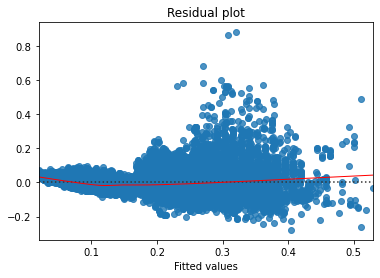

In [21]:
# Residual plot
sns.residplot(lm.predict(X_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

[-0.12000532 -0.13659793 -0.0214607  ...  0.02453287  0.03164611
  0.01624628]


Text(0.5, 1.0, 'Normal Q-Q Plot')

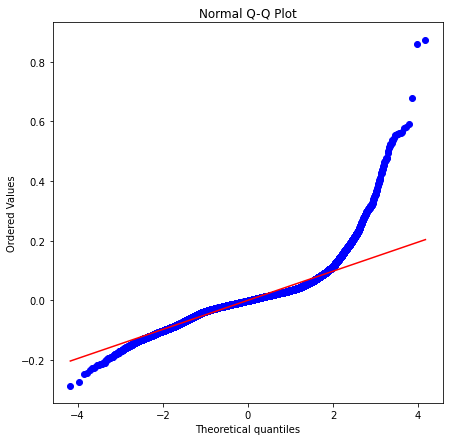

In [22]:
# QQ Plot
residuals = y_test - lm.predict(X_test).reshape(-1)
print(residuals)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

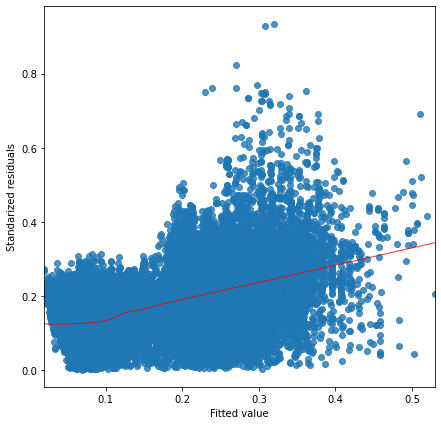

In [23]:
# Scale Location Plot
norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(lm.predict(X_test).reshape(-1), norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

### 2.3 Feature Cross

In [24]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

### 2.4 Error Metrics and Coefficients

In [26]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

lm.fit(OHE_train, y_train)

mse_training = mse(lm.predict(OHE_train), y_train)
mse_testing = mse(lm.predict(OHE_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.0020060337248861844, testing mse: 0.002402315631339588
training rmse: 0.04478876784291107, testing rmse: 0.04901342297105547


In [27]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(OHE_train, y_train), lm.score(OHE_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1), 
    1 - (1-lm.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-OHE_test.shape[1]-1)))


training R2: 0.7981112617159727, testing R2: 0.780462097570134
training adjusted R2: 0.7980387556035948, testing adjusted R2: 0.7803091128163665


In [28]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(OHE_train)),
    mean_absolute_error(y_test, lm.predict(OHE_test)),    
))

training MAE: 0.027297528631681212, testing MAE: 0.03170659466945321


In [29]:
# Calculate sMAPE
smape_training = smape(y_train, lm.predict(OHE_train))
smape_testing = smape(y_test, lm.predict(OHE_test))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 21.624225502331466, testing smape: 22.31170215434254


In [30]:
# Calulate MAPE
mape_training = MAPE(y_train, lm.predict(OHE_train))
mape_testing = MAPE(y_test, lm.predict(OHE_test))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: inf, testing mape: 22.898168516060952


<ipython-input-20-bbc8ce926891>:3: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100


### 2.5 Residual Plots for Feature-Crossed Model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

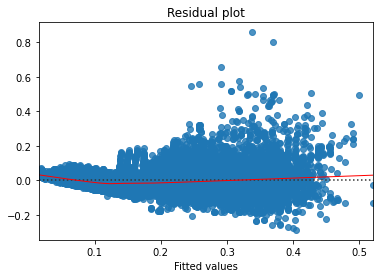

In [31]:
# Residual plot
sns.residplot(lm.predict(OHE_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

[-0.06780451 -0.12652634 -0.01178546 ...  0.00468426  0.00553688
 -0.00910996]


Text(0.5, 1.0, 'Normal Q-Q Plot')

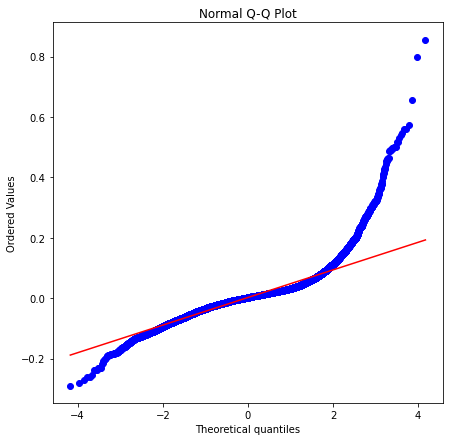

In [32]:
# QQ Plot
residuals = y_test - lm.predict(OHE_test).reshape(-1)
print(residuals)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

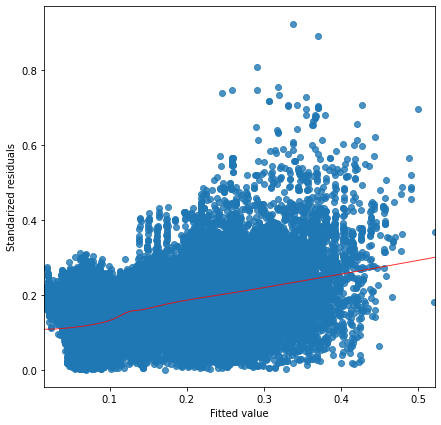

In [33]:
# Scale Location Plot
norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(lm.predict(OHE_test).reshape(-1).reshape(-1), norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

In [34]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], lm.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,-0.004051
1,street,-0.000004
2,propertyType,0.002976
3,remaining_lease,0.055737
4,school,-0.017757
5,hawkercentre,-0.076326
6,supermarkets,-0.081209
7,Bus Stops Nearby,0.004767
8,crime_number,0.016878
9,floor_range,0.011602


### 3. Polynomial Regression and Error Metrics

In [35]:
pre_process = PolynomialFeatures(degree=2)

# Transform with OHE datasets
X_poly = pre_process.fit_transform(OHE_train)
X_test_poly = pre_process.transform(OHE_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

mse_training = mse(poly_model.predict(X_poly), y_train)
mse_testing = mse(poly_model.predict(X_test_poly), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.00108885709686506, testing mse: 0.023523812069780995
training rmse: 0.03299783472994948, testing rmse: 0.15337474391105269


In [36]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(poly_model.score(X_poly, y_train), 
                                               poly_model.score(X_test_poly, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-poly_model.score(X_poly, y_train))*(len(y_train)-1)/(len(y_train)-X_poly.shape[1]-1), 
    1 - (1-poly_model.score(X_test_poly, y_test))*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1)))


training R2: 0.890416605299012, testing R2: -1.1497459749176717
training adjusted R2: 0.8897225305309986, testing adjusted R2: -1.1763146983034845


In [37]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, poly_model.predict(X_poly)),
    mean_absolute_error(y_test, poly_model.predict(X_test_poly)),    
))

training MAE: 0.018637080552233773, testing MAE: 0.02379010410233395


In [38]:
# Calculate sMAPE
smape_training = smape(y_train, poly_model.predict(X_poly))
smape_testing = smape(y_test, poly_model.predict(X_test_poly))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 13.57569302998217, testing smape: 15.00303303226192


In [39]:
# Calculate MAPE
mape_training = MAPE(y_train, poly_model.predict(X_poly))
mape_testing = MAPE(y_test, poly_model.predict(X_test_poly))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: inf, testing mape: 15.483325697231374


<ipython-input-20-bbc8ce926891>:3: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100


In [40]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], poly_model.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,0.000575
1,street,-0.629106
2,propertyType,0.014004
3,remaining_lease,0.009421
4,school,3106.227496
5,hawkercentre,0.366250
6,supermarkets,-0.737702
7,Bus Stops Nearby,0.248399
8,crime_number,0.019856
9,floor_range,0.097932
